In [1]:
#Imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

C:\Users\rrsoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
#Normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean_train = np.mean(X_train, axis = (0,1,2,3))
std_train = np.std(X_train, axis = (0,1,2,3))
mean_test = np.mean(X_test, axis = (0,1,2,3))
std_test = np.std(X_test, axis = (0,1,2,3))
X_train = (X_train-mean_train)/(std_train)
X_test = (X_test - mean_test)/(std_test)

In [6]:
model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
50000/50000 [==============================] - 15s 306us/step - loss: 1.7812 - acc: 0.3801
Epoch 2/5
50000/50000 [==============================] - 15s 292us/step - loss: 1.5463 - acc: 0.4542
Epoch 3/5
50000/50000 [==============================] - 13s 256us/step - loss: 1.4551 - acc: 0.4897
Epoch 4/5
50000/50000 [==============================] - 13s 250us/step - loss: 1.3972 - acc: 0.5068
Epoch 5/5
50000/50000 [==============================] - 14s 275us/step - loss: 1.3490 - acc: 0.5243


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([6.5678321e-02, 5.1003490e-03, 1.8606950e-01, 4.4560894e-01,
       6.3178644e-02, 1.3644485e-01, 7.0488490e-02, 6.7635500e-03,
       2.0252854e-02, 4.1452987e-04, 8.0959106e-13, 1.9632075e-11,
       2.6122792e-13, 6.2160494e-12, 2.3133726e-12, 2.6747507e-11,
       1.8373950e-11, 6.9778997e-13, 7.0486314e-14, 1.5555291e-12,
       2.0821536e-10, 1.6091085e-13, 3.0676125e-14, 1.4161939e-11,
       1.2819171e-13, 2.7226754e-12, 1.4982951e-10, 1.5996553e-10,
       1.8000781e-10, 4.9904412e-12, 3.0989293e-13, 3.8945572e-13],
      dtype=float32)

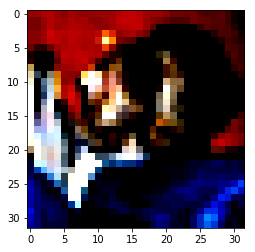

In [7]:
n = 0
predict = model.predict(X_test)
plt.imshow(X_test[n])
predict[n]